# Section 3: Coding Demo

## In this section, we aim to demonstrate: 
### 3.1 How to build small world model?
### 3.2 How to use configuration model to generate random networks from a given degree sequence?
### 3.3 How to calculate the modularity?


In [1]:
import numpy as np
import networkx as nx
# If you are using https://jupyter.org/try-jupyter/lab/ uncomment following two lines
# import micropip
# await micropip.install("scipy") 

# This function is defined to plot the graph.
def plot_graph(graph, diGraph = False):
    if diGraph:
        g = nx.DiGraph()
    else:
        g = nx.Graph()
    # Create a directed graph object.
    for key, value in graph.items():
        for neighbor in value:
            # Add an edge between the node and its neighbor.
            g.add_edge(key,neighbor)
    # Draw the graph.
    nx.draw(g, with_labels=True)


 # This function outputs an Graph object from networkx package.    
def graph_networkx(graph,diGraph = False):
    if diGraph:
        g = nx.DiGraph()
    else:
        g = nx.Graph()
    # Create a directed graph object.
    for key, value in graph.items():
        for neighbor in value:
            # Add an edge between the node and its neighbor.
            g.add_edge(key,neighbor)
    return g

### 3.1 How to build small world model?
What is Small World Phenomenon? Small World Phenomenon is the study and notion that we are all connected via a small number of edges. There have been three notable experiments to prove the Small World Phenomenon:

__Milgram Small World Phenomenon Experiment__: 296 randomly chosen persons were asked to forward a letter to a ‘target’ person (a Stockbroker in Boston). The letter was to be sent directly to him if the person was known personally, otherwise, the letter was to be sent to someone who has a higher probability of knowing him personally. 64 letters reached the target person with a median length of 6 ie. on average a random person was connected to the target person via 6 people in between.

__Microsoft Instant Messenger Experiment__: There are 240 million active users of Microsoft Instant Messenger. They are connected if two users were engaged in a 2-way communication over the period of a month. For any two random people, the median distance was 7 i.e. 2 random people were connected via 7 intermediate connections.

__Facebook based Experiment__: The experiment conducted by Facebook calculated the average path length to be 5.28 in 2008 whereas it reduced to be 4.74 in 2011.

Reference: https://www.geeksforgeeks.org/small-world-model-using-python-networkx/

We have three functions in networkx:

watts_strogatz_graph()

newman_watts_strogatz_graph()

connected_watts_strogatz_graph()

watts_strogatz_graph() first creates a ring over n nodes. Then each node in the ring is connected with its k nearest neighbors (k-1 neighbors if k is odd). Then shortcuts are created by replacing some edges as follows: for each edge u-v in the underlying “n-ring with k nearest neighbors” with probability p replace it with a new edge u-w with uniformly random choice of existing node w.
In contrast with newman_watts_strogatz_graph(), the random rewiring does not increase the number of edges. The rewired graph is not guaranteed to be connected as in connected_watts_strogatz_graph().

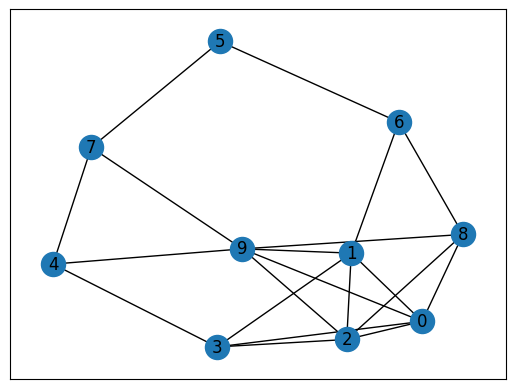

In [7]:
G = nx.watts_strogatz_graph(n = 10, k = 4, p = 0.5)
nx.draw_networkx(G)

The resultant Small World Network maybe a disconnected Graph. If we wish to get a connected Graph, we can modify the code as follows: 

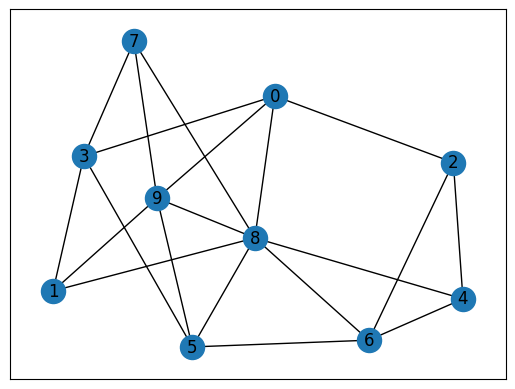

In [10]:
G = nx.connected_watts_strogatz_graph(n=10, k=4, p=0.5, tries=100)
nx.draw_networkx(G)

It runs the original function t times (in this case tries = 100) till a connected network is achieved. 

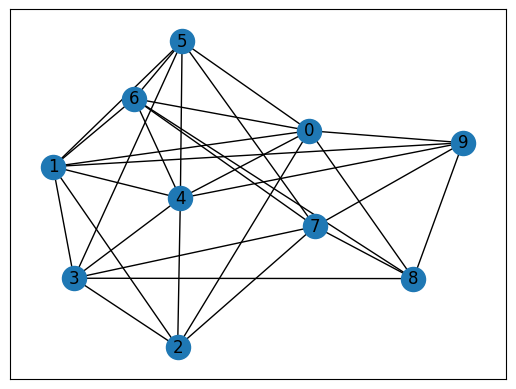

In [12]:
G = nx.newman_watts_strogatz_graph(n=10, k=4, p=0.5)
nx.draw_networkx(G)

The above code will run a similar model but add new edges with probability p instead of rewiring already existing edges.

Here we implement the small world graph generation without networkx, following the lecture silde Page 13

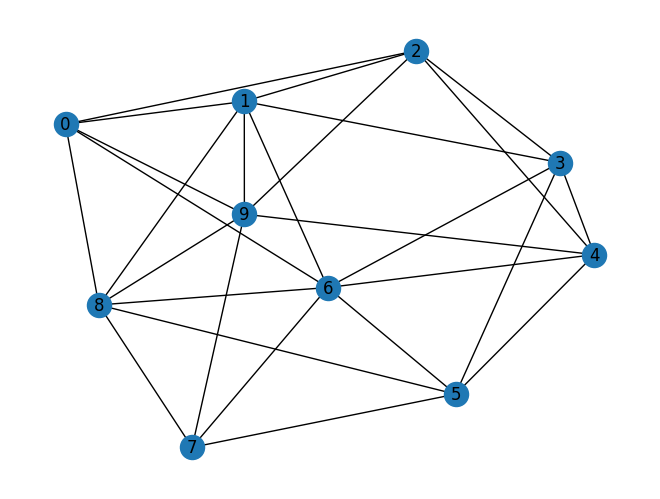

In [34]:
def small_world_graph(n, c, p):
    # Create a regular ring lattice
    k = int(np.floor(c/2))
    A = np.zeros((n,n))
    for i in range(n):
        for j in range(i-k,i+k+1):
            if i != j%n:
                A[i,j%n] = 1

    # Rewire edges
    for i in range(n):
        for j in range(i+1,n):
            # No self loop or multi-edges
            if np.random.rand() < p and i!=j and A[i, j] == 0:
                A[i,j] = 1
                A[j,i] = 1

    # Generate adjacency list
    adj_list = {}
    for i in range(n):
        adj_list[i] = []
        for j in range(n):
            if A[i,j] == 1:
                adj_list[i].append(j)

    return adj_list

plot_graph(small_world_graph(10,4,0.3))

### 3.2 How to use configuration model to generate random networks from a given degree sequence?

[3 1 0 0 1 4 0 2 3 5]


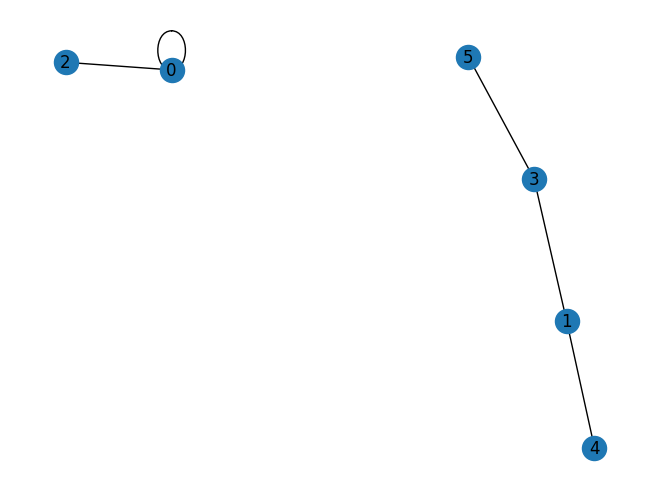

In [28]:
def generate_random_network_configuration(deg_seq):
    n = len(deg_seq)
    # m is the number of edges in the graph
    m = sum(deg_seq) // 2
    edges = np.repeat(np.arange(n), deg_seq)
    np.random.shuffle(edges)
    print(edges)
    edges = edges.reshape((m, 2))
    G = np.zeros((n, n), dtype=int)
    graph = {i:set() for i in range(n)}
    for i, j in edges:
        graph[i].add(j)
        graph[j].add(i)
    return graph


degree_sequence = [3, 2, 1, 2, 1, 1]
plot_graph(generate_random_network_configuration(degree_sequence))

### 3.3 How to calculate the modularity?



The example is from Page 30 of Week 6 Lecture slides. Please compare the results from the slide and from the code.

In [44]:
graph = {0:[2,3],
         1:[2,3],
         2:[0,1],
         3:[0,1]
         }

# the function is  feasible only when the node is represented by numbers, and starting from 0
def community_modularity(graph, community):
    n = len(graph)
    A = np.zeros((n,n))
    d = np.zeros(n)
    # m is the number of edges in the graph
    m = sum(len(temp_adj_list) for _, temp_adj_list in graph.items())//2
    # construct degree vector and adjacency matrix
    for i in range(n):
        d[i] = len(graph[i])
        for j in range(len(graph[i])):
            A[i][graph[i][j]] = 1

    B = A - np.outer(d,d)/(2*m)

    #construct delta matrix
    delta = np.zeros((n, len(community)))
    for temp_index in range(len(community)):
        for node in community[temp_index]:
            delta[node][temp_index] = 1
            
    print("delta matrix: ")
    print(delta)
    Q = 1/(2*m) * np.trace(np.dot(np.dot(delta.T,B),delta))
    return Q

print("result from the code: ", community_modularity(graph,[{0, 1}, {2,3}]))
print("result from the networkx: ", nx.algorithms.community.modularity(graph_networkx(graph),[{0, 1}, {2,3}]))

delta matrix: 
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
result from the code:  -0.5
result from the networkx:  -0.5
